In [ ]:
import sys
if 'google.colab' in sys.modules:
    import subprocess
    subprocess.call("pip install -U opencv-python".split())

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pylab as pl

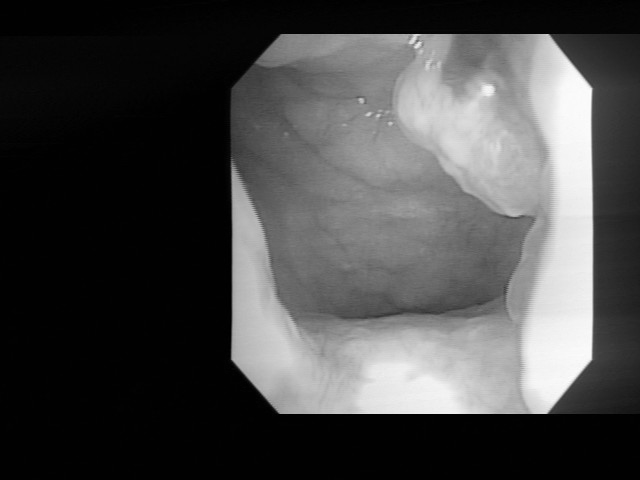

In [ ]:
img_path = "/content/drive/MyDrive/Colab Notebooks/聖馬爾定/Dataset/原始圖片/0045289_0510172120/0045289_0510172120_I00041884860.jpg"

img = cv2.imread(img_path)
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# cv2_imshow(re_img)


# x = 180
# y = 50

# w = 360
# h = 300

# crop_img = dst[y:y+h, x:x+w]
# re_img = cv2.resize(crop_img, (360, 300))

cv2_imshow(imgray)
#cv2.imwrite("/content/drive/My Drive/Colab Notebooks/聖馬爾定/Dataset_Check/Positive_Crop/0945091_0707210724_I00054748314.jpg", re_img)

In [ ]:
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

In [ ]:
path_file = '0526395_0906021380_I00069135660'
count = 0
path = []


for filename in os.listdir('/content/drive/My Drive/Colab Notebooks/聖馬爾定/Dataset_Label/1/'):
  path.append(filename.split(".jpg")[0])

for name in path:
  if name.split("_")[0] == path_file.split("_")[0]:
    count += 1

for i in range(count):
  num = path_file.split("_")[-1][-2:]
  img_name = path_file.split("_")[0] + "_"  + path_file.split("_")[1] + "_" + path_file.split("_")[2][:-2] + str(i + int(num)) + '.jpg'
  img_path = '/content/drive/My Drive/Colab Notebooks/聖馬爾定/Dataset_Label/1/' + img_name

  x = 230
  y = 80

  w = 360
  h = 300

  img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
  crop_img = img_gray[y:y+h, x:x+w]
  img_jet = cv2.applyColorMap(crop_img.copy(), cv2.COLORMAP_JET)

  img_sobel_x = cv2.Sobel(crop_img, cv2.CV_16S, dx=1, dy=0, ksize=3)
  img_sobel_x = cv2.convertScaleAbs(img_sobel_x)

    # 對 y 方向做 Sobel 邊緣檢測
  img_sobel_y = cv2.Sobel(crop_img, cv2.CV_16S, dx=0, dy=1, ksize=3)
  img_sobel_y = cv2.convertScaleAbs(img_sobel_y)

    # x, y 方向的邊緣檢測後的圖各以一半的全重進行合成
  img_sobel_combine = cv2.addWeighted(img_sobel_x, 0.5, img_sobel_y, 0.5, 0)

  cv2.imwrite("/content/drive/My Drive/Colab Notebooks/聖馬爾定/Label_v2/1/" + img_name, img_jet)
  cv2.imwrite("/content/drive/My Drive/Colab Notebooks/聖馬爾定/Label_Sobel/1/"  + img_name, img_sobel_combine)

In [ ]:
img_path = '/content/drive/My Drive/Colab Notebooks/聖馬爾定/Dataset_Check/Jet/1/4595198_0602200813_I00044336809.jpg'

img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

z = np.asarray(img_gray)
mydata = z[::1,::1]
x,y = np.mgrid[:mydata.shape[0],:mydata.shape[1]]

In [ ]:
#z = z.reshape(x.shape)
z.shape

(300, 360)

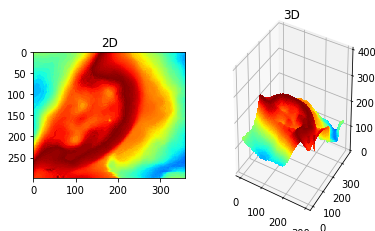

In [ ]:
fig = pl.figure(facecolor='w')
ax1 = fig.add_subplot(1,2,1)
im = ax1.imshow(mydata,interpolation='nearest',cmap=pl.cm.jet)
ax1.set_title('2D')

ax2 = fig.add_subplot(1,2,2,projection='3d')
x,y = np.mgrid[:mydata.shape[0],:mydata.shape[1]]
ax2.plot_surface(x,y,mydata,cmap=pl.cm.jet,rstride=1,cstride=1,linewidth=0.,antialiased=False)
ax2.set_title('3D')
ax2.set_zlim3d(0,400)
pl.show()

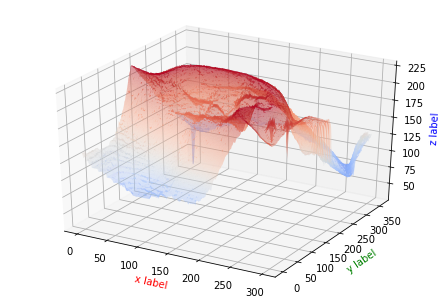

In [ ]:
fig1=plt.figure()#建立一個繪圖物件
ax=Axes3D(fig1)#用這個繪圖物件建立一個Axes物件(有3D座標)

mydata = z[::1,::1]
x,y = np.mgrid[:mydata.shape[0],:mydata.shape[1]]

ax.plot_surface(x, y, mydata, rstride=1, cstride=1, cmap=plt.cm.coolwarm,alpha=0.5)#用取樣點(x,y,z)去構建曲面
ax.set_xlabel('x label', color='r')
ax.set_ylabel('y label', color='g')
ax.set_zlabel('z label', color='b')#給三個座標軸註明
plt.show()#顯示模組中的所有繪圖物件

In [ ]:
img_name = '0009911_0804032249_I00060161231' + '.jpg'
img_path = '/content/drive/My Drive/Colab Notebooks/聖馬爾定/Dataset_Label/1/' + img_name

x = 270
y = 80

w = 360
h = 300

img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
crop_img = img_gray[y:y+h, x:x+w]
img_jet = cv2.applyColorMap(crop_img.copy(), cv2.COLORMAP_JET)

img_sobel_x = cv2.Sobel(crop_img, cv2.CV_16S, dx=1, dy=0, ksize=3)
img_sobel_x = cv2.convertScaleAbs(img_sobel_x)

# 對 y 方向做 Sobel 邊緣檢測
img_sobel_y = cv2.Sobel(crop_img, cv2.CV_16S, dx=0, dy=1, ksize=3)
img_sobel_y = cv2.convertScaleAbs(img_sobel_y)

# x, y 方向的邊緣檢測後的圖各以一半的全重進行合成
img_sobel_combine = cv2.addWeighted(img_sobel_x, 0.5, img_sobel_y, 0.5, 0)

cv2.imwrite("/content/drive/My Drive/Colab Notebooks/聖馬爾定/Label_v2/1/" + img_name, img_jet)
cv2.imwrite("/content/drive/My Drive/Colab Notebooks/聖馬爾定/Label_Sobel/1/"  + img_name, img_sobel_combine)

True

# Method

In [ ]:
def img_preprocess(img, label, count):
  img = img.split("_")[0] + "_"  + img.split("_")[1] + "_" + img.split("_")[2][:-2]
  num = int(img.split("_")[2][-2:])

  for i in range(count):
    img_name = img + str(i + int(num)) + '.jpg'
    img_path = '/content/drive/My Drive/Colab Notebooks/聖馬爾定/Dataset_Label/'+ str(label) + '/' + img_name

    x = 237
    y = 80

    w = 360
    h = 300

    img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img_gray = cv2.GaussianBlur(img_gray, (7, 7), 0)
    crop_img = img_gray[y:y+h, x:x+w]
    img_jet = cv2.applyColorMap(crop_img.copy(), cv2.COLORMAP_JET)

    img_sobel_x = cv2.Sobel(crop_img, cv2.CV_16S, dx=1, dy=0, ksize=3)
    img_sobel_x = cv2.convertScaleAbs(img_sobel_x)

      # 對 y 方向做 Sobel 邊緣檢測
    img_sobel_y = cv2.Sobel(crop_img, cv2.CV_16S, dx=0, dy=1, ksize=3)
    img_sobel_y = cv2.convertScaleAbs(img_sobel_y)

      # x, y 方向的邊緣檢測後的圖各以一半的全重進行合成
    img_sobel_combine = cv2.addWeighted(img_sobel_x, 0.5, img_sobel_y, 0.5, 0)

    cv2_imshow(img_jet)
    cv2_imshow(img_sobel_combine)
    cv2.imwrite("/content/drive/My Drive/Colab Notebooks/聖馬爾定/Label_Sobel/"+ str(label) + '/'  + img_name, img_sobel_combine)

# Multiple Blocks

In [ ]:
img_name = '0153694_0609200875_I00048744408'
img_path = '/content/drive/My Drive/Colab Notebooks/聖馬爾定/Label_v2/1/0153694_0609200875_I00048744408.jpg'

img = cv2.imread(img_path)

nRows = int(2)
mCols = int(2)

sizeX = img.shape[1]
sizeY = img.shape[0]
roi = []

cut_pixel_x = int(sizeX / nRows)
cut_pixel_y = int(sizeY / nRows)

print(cut_pixel_x, cut_pixel_y)

cv2_imshow(img)

for i in range(0,nRows):
    for j in range(0, mCols):
        roi.append(img[(i * 150):((i + 1) * 150), (j * 180):((j + 1) * 180)])

for i in range(len(roi)):
        cv2_imshow(roi[i])

In [ ]:
img_path = '/content/drive/My Drive/Colab Notebooks/聖馬爾定/Label_v2/1/'
roi = []
img_filename = []

nRows = int(2)
mCols = int(2)

for filename in os.listdir(img_path):
  img_filename.append(filename.split(".jpg")[0])
  img = cv2.imread(img_path + filename)

  for i in range(0,nRows):
    for j in range(0, mCols):
        roi.append(img[(i * 150):((i + 1) * 150), (j * 180):((j + 1) * 180)])

count = 0
for i in range(len(img_filename)):
  cv2.imwrite('/content/drive/My Drive/Colab Notebooks/聖馬爾定/Dataset/Croping/0/' + img_filename[i] + "_0.jpg", roi[count]) #0, 0
  count += 1
  cv2.imwrite('/content/drive/My Drive/Colab Notebooks/聖馬爾定/Dataset/Croping/1/' + img_filename[i] + "_1.jpg", roi[count]) #0, 1
  count += 1
  cv2.imwrite('/content/drive/My Drive/Colab Notebooks/聖馬爾定/Dataset/Croping/2/' + img_filename[i] + "_2.jpg", roi[count]) #1, 0
  count += 1
  cv2.imwrite('/content/drive/My Drive/Colab Notebooks/聖馬爾定/Dataset/Croping/3/' + img_filename[i] + "_3.jpg", roi[count]) #1, 1
  count += 1

In [ ]:
for i in range(4)
  cv2.imwrite('/content/drive/My Drive/Colab Notebooks/聖馬爾定/Dataset/Croping/0/' + img_filename[0] + "_" + str(i) + ".jpg", roi[i]) #0, 0

'3986116_0906161986_I00069461456.jpg'

In [ ]:
img_path = '/content/drive/My Drive/Colab Notebooks/聖馬爾定/Label_v2/0/'
roi = []
img_filename = []

nRows = int(2)
mCols = int(2)

for filename in os.listdir(img_path):
  img_filename.append(filename.split(".jpg")[0])
  img = cv2.imread(img_path + filename)

  for i in range(0,nRows):
    for j in range(0, mCols):
        roi.append(img[(i * 150):((i + 1) * 150), (j * 180):((j + 1) * 180)])

count = 0
for i in range(len(img_filename)):
  cv2.imwrite('/content/drive/My Drive/Colab Notebooks/聖馬爾定/Dataset/Croping/All_data/' + img_filename[i] + "_0.jpg", roi[count]) #0, 0
  count += 1
  cv2.imwrite('/content/drive/My Drive/Colab Notebooks/聖馬爾定/Dataset/Croping/All_data/' + img_filename[i] + "_1.jpg", roi[count]) #0, 1
  count += 1
  cv2.imwrite('/content/drive/My Drive/Colab Notebooks/聖馬爾定/Dataset/Croping/All_data/' + img_filename[i] + "_2.jpg", roi[count]) #1, 0
  count += 1
  cv2.imwrite('/content/drive/My Drive/Colab Notebooks/聖馬爾定/Dataset/Croping/All_data/' + img_filename[i] + "_3.jpg", roi[count]) #1, 1
  count += 1

In [ ]:
roi.clear()
img_filename.clear()
count = 0

# Picture show

(480, 720, 3)


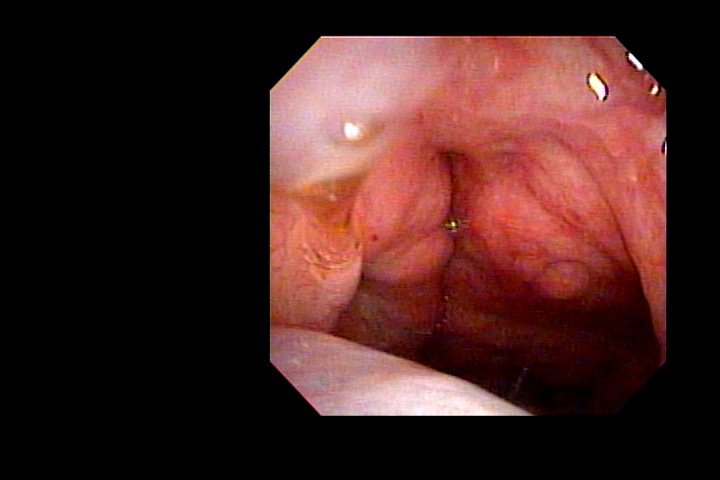

(300, 360, 3)


In [ ]:
img = cv2.imread('/content/drive/My Drive/Colab Notebooks/聖馬爾定/Dataset_Check/Negative/0009911_0804032249_I00060161231.jpg')
print(img.shape)
cv2_imshow(img)
clone = img.copy()

clone = cv2.resize(clone, (360, 300))
print(clone.shape)

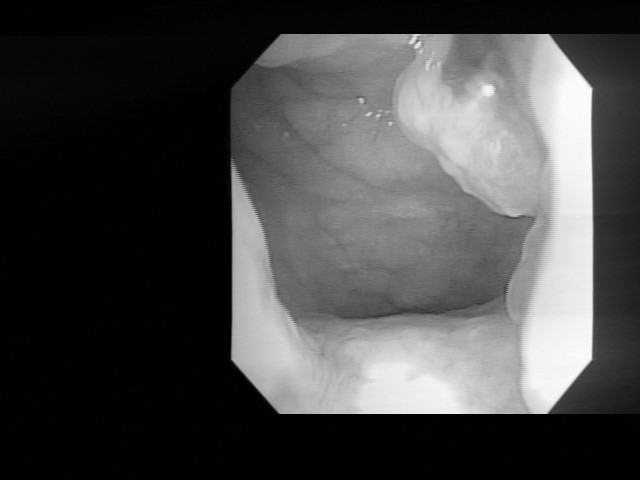

In [ ]:
img = cv2.imread(r'/content/drive/My Drive/Colab Notebooks/聖馬爾定/Dataset/0045289_0510172120/0045289_0510172120_I00041884860.jpg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)

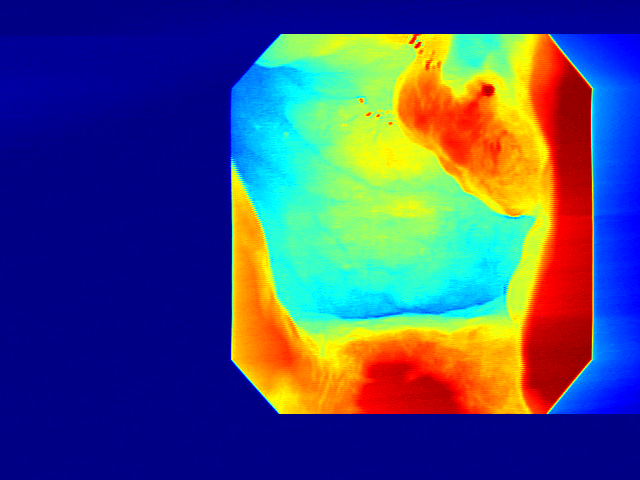

In [ ]:
img_jet = cv2.applyColorMap(img, cv2.COLORMAP_JET)
cv2_imshow(img_jet)

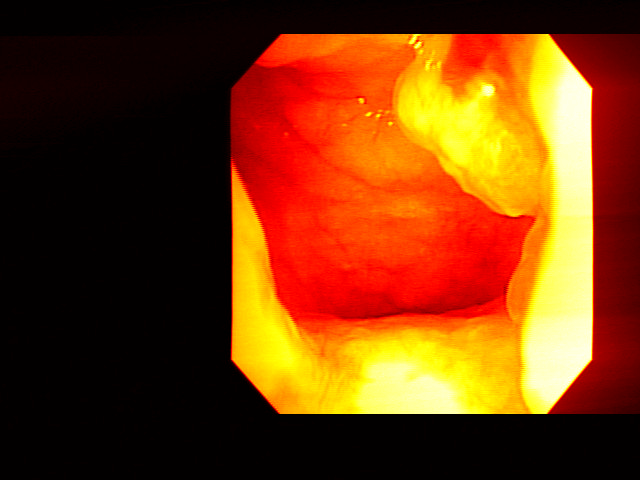

In [ ]:
img_hot = cv2.applyColorMap(img, cv2.COLORMAP_HOT)
cv2_imshow(img_hot)

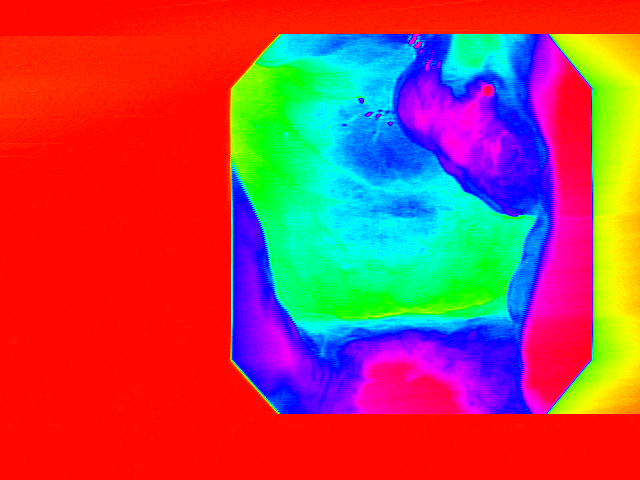

In [ ]:
img_hsv = cv2.applyColorMap(img, cv2.COLORMAP_HSV)
cv2_imshow(img_hsv)

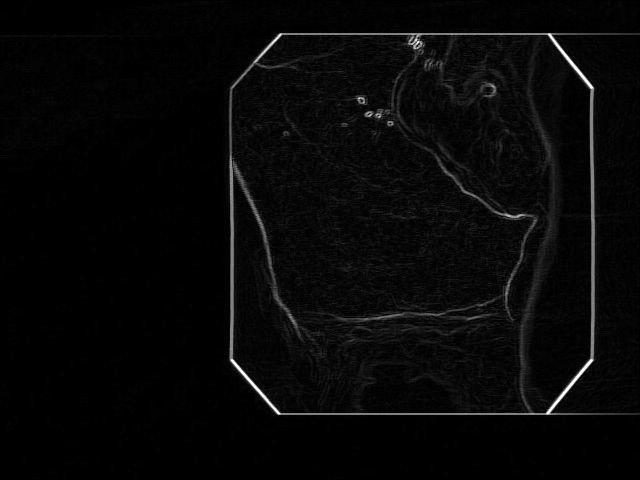

In [ ]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_sobel_x = cv2.Sobel(img_gray, cv2.CV_16S, dx=1, dy=0, ksize=3)
img_sobel_x = cv2.convertScaleAbs(img_sobel_x)

# 對 y 方向做 Sobel 邊緣檢測
img_sobel_y = cv2.Sobel(img_gray, cv2.CV_16S, dx=0, dy=1, ksize=3)
img_sobel_y = cv2.convertScaleAbs(img_sobel_y)

# x, y 方向的邊緣檢測後的圖各以一半的全重進行合成
img_sobel_combine = cv2.addWeighted(img_sobel_x, 0.5, img_sobel_y, 0.5, 0)

cv2_imshow(img_sobel_combine)

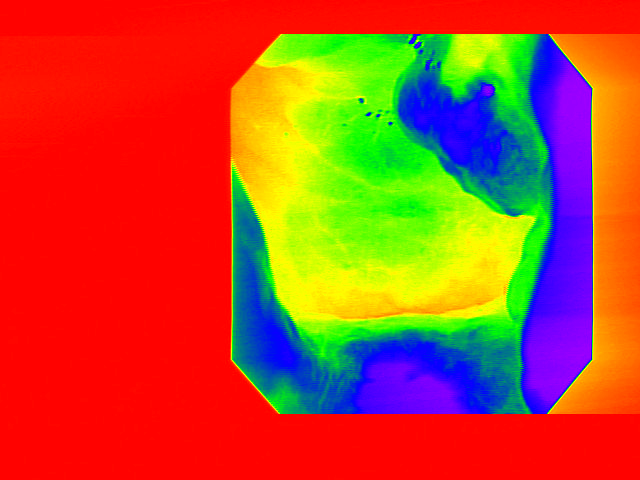

In [ ]:
img_rainbow = cv2.applyColorMap(img, cv2.COLORMAP_RAINBOW)
cv2_imshow(img_rainbow)

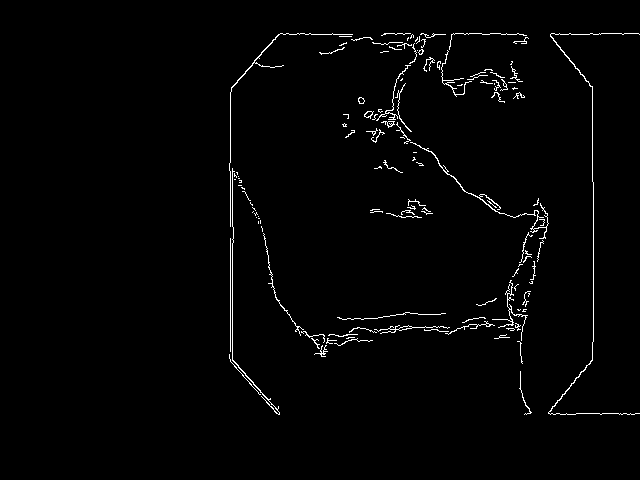

In [ ]:
img_canny = cv2.Canny(img_gray, 128, 256)
cv2_imshow(img_canny)

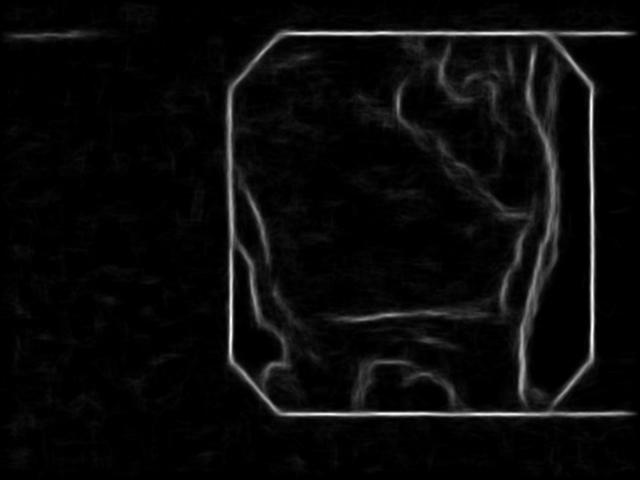

In [ ]:
src = cv2.imread(img_path, 1)
blurred_img = cv2.GaussianBlur(src, (5, 5), 0)
blurred_float = blurred_img.astype(np.float32) / 255.0
edgeDetector = cv2.ximgproc.createStructuredEdgeDetection("/content/drive/My Drive/Colab Notebooks/聖馬爾定/model.yml")
edges = edgeDetector.detectEdges(blurred_float) * 255.0

cv2_imshow(edges)

In [ ]:
def draw_approx_hull_polygon(img, cnts):
    # img = np.copy(img)
    img = np.zeros(img.shape, dtype=np.uint8)

    cv2.drawContours(img, cnts, -1, (255, 0, 0), 2)  # blue

    epsilion = img.shape[0]/32
    approxes = [cv2.approxPolyDP(cnt, epsilion, True) for cnt in cnts]
    cv2.polylines(img, approxes, True, (0, 255, 0), 2)  # green

    hulls = [cv2.convexHull(cnt) for cnt in cnts]
    cv2.polylines(img, hulls, True, (0, 0, 255), 2)  # red
    return img

# Save Image

In [ ]:
x = 150
y = 20

h = 450
w = 450

In [ ]:
path = '/content/drive/My Drive/Colab Notebooks/聖馬爾定/Dataset_Label/1/'
save_path = "/content/drive/My Drive/Colab Notebooks/聖馬爾定/Label_v2/1/"

for filename in os.listdir(path):
  img_gray = cv2.imread(path + filename, cv2.IMREAD_GRAYSCALE)
  img_jet = cv2.applyColorMap(img_gray.copy(), cv2.COLORMAP_JET)
  #crop_img = img_jet[y:y+h, x:x+w]
  cv2.imwrite(save_path + filename, img_jet)

In [ ]:
path = '/content/drive/My Drive/Colab Notebooks/聖馬爾定/Dataset_Label/0/'
save_path = "/content/drive/My Drive/Colab Notebooks/聖馬爾定/Label_v2/0/"

for filename in os.listdir(path):
  img_gray = cv2.imread(path + filename, cv2.IMREAD_GRAYSCALE)
  img_jet = cv2.applyColorMap(img_gray.copy(), cv2.COLORMAP_JET)
  #crop_img = img_jet[y:y+h, x:x+w]
  cv2.imwrite(save_path + filename, img_jet)

In [ ]:
path = '/content/drive/My Drive/Colab Notebooks/聖馬爾定/Dataset_Check/Original/0/'
save_path = "/content/drive/My Drive/Colab Notebooks/聖馬爾定/Dataset_Check/Jet/0/"

for filename in os.listdir(path):
  img_gray = cv2.imread(path + filename, cv2.IMREAD_GRAYSCALE)
  img_jet = cv2.applyColorMap(img_gray.copy(), cv2.COLORMAP_JET)
  img_jet = cv2.resize(img_jet, (360, 300))
  cv2.imwrite(save_path + filename, img_jet)

In [ ]:
path = '/content/drive/My Drive/Colab Notebooks/聖馬爾定/Dataset_Check/Original/1/'
save_path = "/content/drive/My Drive/Colab Notebooks/聖馬爾定/Dataset_Check/Sobel/1/"

for filename in os.listdir(path):
  img_gray = cv2.imread(path + filename, cv2.IMREAD_GRAYSCALE)
  img_sobel_x = cv2.Sobel(img_gray, cv2.CV_16S, dx=1, dy=0, ksize=3)
  img_sobel_x = cv2.convertScaleAbs(img_sobel_x)

  # 對 y 方向做 Sobel 邊緣檢測
  img_sobel_y = cv2.Sobel(img_gray, cv2.CV_16S, dx=0, dy=1, ksize=3)
  img_sobel_y = cv2.convertScaleAbs(img_sobel_y)

  # x, y 方向的邊緣檢測後的圖各以一半的全重進行合成
  img_sobel_combine = cv2.addWeighted(img_sobel_x, 0.5, img_sobel_y, 0.5, 0)
  cv2.imwrite(save_path + filename, img_sobel_combine)

In [ ]:
path = '/content/drive/My Drive/Colab Notebooks/聖馬爾定/Dataset_Check/Original/0/'
save_path = "/content/drive/My Drive/Colab Notebooks/聖馬爾定/Dataset_Check/HSV/0/"

for filename in os.listdir(path):
  img_gray = cv2.imread(path + filename, cv2.IMREAD_GRAYSCALE)
  img_hsv = cv2.applyColorMap(img_gray.copy(), cv2.COLORMAP_HSV)
  img_hsv = cv2.resize(img_hsv, (360, 300))
  cv2.imwrite(save_path + filename, img_hsv)

# Test

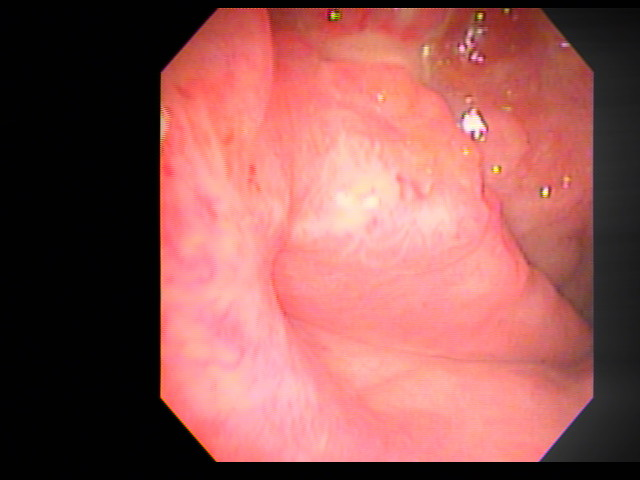

In [ ]:
img_path = "/content/drive/MyDrive/Colab Notebooks/聖馬爾定/Dataset_Check/Original/1/0153694_0609200875_I00048744408.jpg"

img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# # threshold input image using otsu thresholding as mask and refine with morphology
# ret, mask = cv2.threshold(gray, 40, 255, cv2.THRESH_BINARY) 
# kernel = np.ones((9,9), np.uint8)
# mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
# mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

#   # put mask into alpha channel of image
# result = img.copy()
# result = cv2.cvtColor(result, cv2.COLOR_BGR2BGRA)
# result[:, :, 3] = mask

cv2_imshow(img)

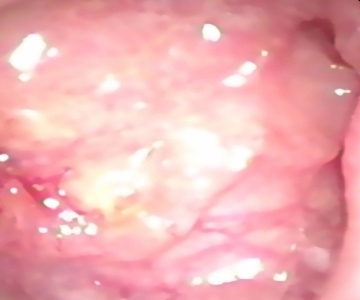

In [ ]:
path = '/content/drive/My Drive/Colab Notebooks/聖馬爾定/Dataset_Check/Original/1/'
filename = "0945091_0707210724_I00054748314.jpg"

img = cv2.imread(path + filename)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# # threshold input image using otsu thresholding as mask and refine with morphology
# ret, mask = cv2.threshold(gray, 40, 255, cv2.THRESH_BINARY) 
# kernel = np.ones((9,9), np.uint8)
# mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
# mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

# # put mask into alpha channel of image
# result = img.copy()
# result = cv2.cvtColor(result, cv2.COLOR_BGR2BGRA)
# result[:, :, 3] = mask

cv2_imshow(img)
#cv2.imwrite(save_path + filename.split(".")[0] + ".png", result)

In [ ]:
from skimage import measure

def create_mask(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY )
    blurred = cv2.GaussianBlur( gray, (9,9), 0 )
    _,thresh_img = cv2.threshold(blurred, 215, 255, cv2.THRESH_BINARY)
    thresh_img = cv2.erode( thresh_img, None, iterations=2 )
    thresh_img  = cv2.dilate( thresh_img, None, iterations=4 )
    # perform a connected component analysis on the thresholded image,
    # then initialize a mask to store only the "large" components
    labels = measure.label( thresh_img, connectivity=2, background=0 )
    mask = np.zeros( thresh_img.shape, dtype="uint8" )
    # loop over the unique components
    for label in np.unique( labels ):
        # if this is the background label, ignore it
        if label == 0:
            continue
        # otherwise, construct the label mask and count the
        # number of pixels
        labelMask = np.zeros( thresh_img.shape, dtype="uint8" )
        labelMask[labels == label] = 255
        numPixels = cv2.countNonZero( labelMask )
        # if the number of pixels in the component is sufficiently
        # large, then add it to our mask of "large blobs"
        if numPixels > 300:
            mask = cv2.add( mask, labelMask )
    return mask

In [ ]:
# img = cv2.imread(path + filename)

path = '/content/drive/MyDrive/Colab Notebooks/聖馬爾定/Dataset/Original/1/'

for filenames in os.listdir(path):
  img = cv2.imread(path + filenames)

  #specularity removal
  # mask = create_mask(img)
  # telea = cv2.inpaint(img, mask, 12, 0)

  img = cv2.resize(img, (299, 299))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.applyColorMap(img, cv2.COLORMAP_HSV)

  cv2.imwrite("/content/drive/MyDrive/Colab Notebooks/聖馬爾定/Dataset/Hsv_299X299/1/" + filenames.split('.')[0] + "_1" + ".jpg", img)

In [ ]:
# img = cv2.imread(path + filename)

path = '/content/drive/MyDrive/Colab Notebooks/聖馬爾定/Dataset/Original/0/'

for filenames in os.listdir(path):
  img = cv2.imread(path + filenames)

  #specularity removal
  # mask = create_mask(img)
  # telea = cv2.inpaint(img, mask, 12, 0)

  src = cv2.resize(img, (299, 299))

  cv2.imwrite("/content/drive/MyDrive/Colab Notebooks/聖馬爾定/Dataset/Original_224X224/0/" + filenames.split('.')[0] + "_1" + ".jpg", src)

In [ ]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/聖馬爾定/')
import specularity as spc

impath = "/content/drive/My Drive/Colab Notebooks/聖馬爾定/Dataset_Check/Original/1/0945091_0707210724_I00054748314.jpg"
img = cv2.imread(impath)
gray_img = cv2.imread(impath, cv2.IMREAD_GRAYSCALE)

r_img = m_img = np.array(gray_img)

rimg = spc.derive_m(img, r_img)
s_img = spc.derive_saturation(img, rimg)
spec_mask = spc.check_pixel_specularity(rimg, s_img)
#enlarged_spec = spc.enlarge_specularity(spec_mask)

/content/drive/My Drive/Colab Notebooks/聖馬爾定/specularity.py:35: RuntimeWarning: overflow encountered in ubyte_scalars
  s1 = img[ri,ci][0] + img[ri,ci][2]
/content/drive/My Drive/Colab Notebooks/聖馬爾定/specularity.py:40: RuntimeWarning: overflow encountered in ubyte_scalars
  s_img[ri,ci] = 1.5*(rimg[ri,ci] - img[ri,ci][0])


In [ ]:
# use opencv's inpaint methods to remove specularity
radius = 60
telea = cv2.inpaint(img, spec_mask, radius, cv2.INPAINT_TELEA)
ns = cv2.inpaint(img, spec_mask, radius, cv2.INPAINT_NS)

cv2_imshow(img)
cv2_imshow(telea)
cv2_imshow(ns)

In [ ]:
!pip install opencv-contrib-python==3.4.2.17 --force-reinstall

     |████████████████████████████████| 30.6MB 144kB/s 
     |████████████████████████████████| 14.5MB 316kB/s 
ERROR: tensorflow 2.3.0 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.19.2 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [ ]:
img_path = "/content/drive/My Drive/Colab Notebooks/聖馬爾定/Dataset_Check/Positive/0945091_0707210724_I00054748314.jpg"

sift = cv2.xfeatures2d.SIFT_create()
img = cv.imread(img_path)

error: ignored

# Brightness Data Augmentation

In [ ]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sn

(300, 360, 3)


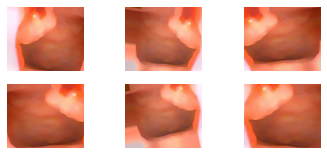

In [ ]:
img = load_img('/content/drive/My Drive/Colab Notebooks/聖馬爾定/Dataset_Check/Original/1/0045289_0510172120_I00041884860.jpg')
# convert to numpy array
data = img_to_array(img)
print(data.shape)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=15,
                                   shear_range=0.1, 
                                   zoom_range=0.2,
                                   horizontal_flip=True, 
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
																	 brightness_range=[1.0, 1.0])
# prepare iterator
it = datagen.flow(samples, 
          batch_size=32)

for i in range(6):
	# define subplot
	plt.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	plt.axis('off')
	plt.imshow(image)
# show the figure
plt.show()

# mapto3d

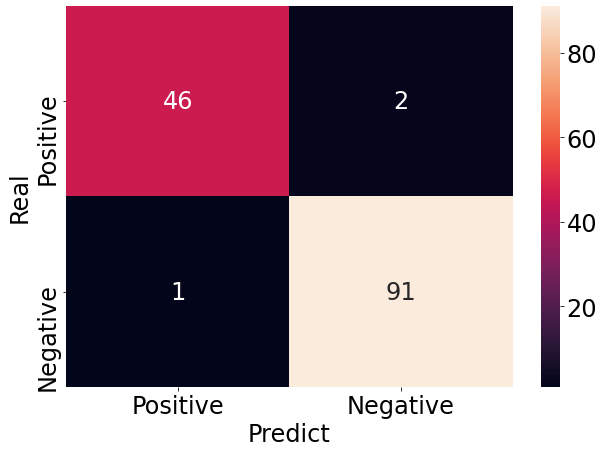

In [ ]:
confusion_test = np.array([46, 2, 1, 91])
confusion_test = confusion_test.reshape((2, 2))

df_confusion_test = pd.DataFrame(confusion_test, columns=['Positive', 'Negative'], index=['Positive', 'Negative'])
df_confusion_test.index.name = 'Real'
df_confusion_test.columns.name = 'Predict'

SMALL_SIZE = 24
MEDIUM_SIZE = 24
BIGGER_SIZE = 12

plt.figure(figsize = (10,7))
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)
sn.heatmap(df_confusion_test, annot=True)

In [ ]:
def gety(x,y):
    s = ax.format_coord(x,y)
    out = ""
    for i in range(s.find('y')+2,s.find('z')-2):
        out = out+s[i]
    return float(out)

# Roi Crop

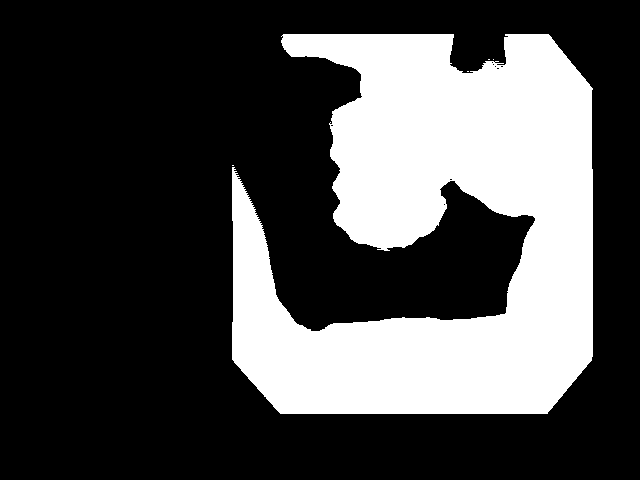

In [ ]:
img_path = r'/content/drive/MyDrive/Colab Notebooks/聖馬爾定/Dataset/原始圖片/0045289_0510172120/0045289_0510172120_I00041884860.jpg'

img = cv2.imread(img_path)
img = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)

h, w = img.shape[:2]

imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
drawContours = cv2.drawContours(imgray, contours, -1, (0, 255, 255), 2)
# rects = [cv2.boundingRect(cnt) for cnt in contours]

# top_x = min([x for (x, y, w, h) in rects])
# top_y = min([y for (x, y, w, h) in rects])
# bottom_x = max([x+w for (x, y, w, h) in rects])
# bottom_y = max([y+h for (x, y, w, h) in rects])

# top_y = top_y + 60
# bottom_y = bottom_y - 60

# roi = img[top_y:bottom_y, top_x:bottom_x]
# roi = cv2.resize(roi, (360, 300))
# roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
# roi = cv2.applyColorMap(roi, cv2.COLORMAP_JET)


# # cv2.imwrite("roi.jpg", roi)
cv2_imshow(thresh)

# SIFT